Iteration = 1, Loss = 1432650.9020
Iteration = 1, Loss = 172659.7000
Iteration = 1, Loss = 20817.0478
Iteration = 1, Loss = 2518.3555
Iteration = 2, Loss = 313.1637
Iteration = 3, Loss = 47.4138
Iteration = 4, Loss = 15.3877
Iteration = 5, Loss = 11.5280
Iteration = 6, Loss = 11.0625
Iteration = 7, Loss = 11.0062
Iteration = 8, Loss = 10.9991
Iteration = 9, Loss = 10.9980
Iteration = 10, Loss = 10.9975
Iteration = 11, Loss = 10.9972
Iteration = 12, Loss = 10.9969
Iteration = 13, Loss = 10.9966
Iteration = 14, Loss = 10.9962
Iteration = 15, Loss = 10.9959
Iteration = 16, Loss = 10.9956
Iteration = 17, Loss = 10.9953
Iteration = 18, Loss = 10.9950
Iteration = 19, Loss = 10.9946
Iteration = 20, Loss = 10.9943


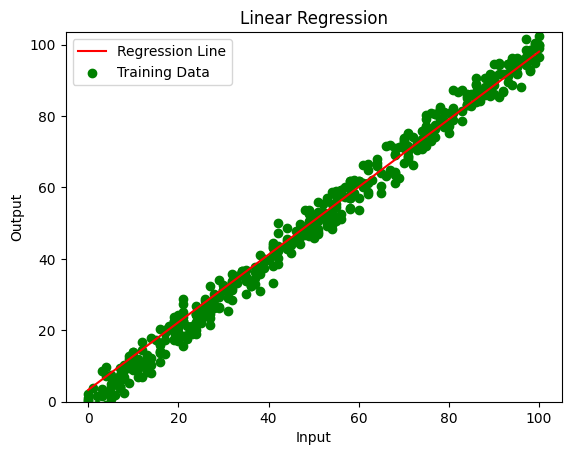

In [31]:
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forwardPropogation(self, train_input):
        m = self.parameters['m']
        b = self.parameters['b']
        predictions = np.multiply(m, train_input) + b
        return predictions

    def gradientDescent(self, predictions, train_input, train_output):
        diff = predictions - train_output
        Jm = np.mean(np.multiply(diff, train_input))*2
        Jb = 2 * np.mean(diff)

        self.parameters['m'] = self.parameters['m'] - self.alpha*Jm
        self.parameters['b'] = self.parameters['b'] - self.alpha*Jb

    def start(self, train_ouput, train_input, iter=20):
        self.parameters['m'] = -20 
        self.parameters['b'] = 3 
        # imp decides the error thing
        # too low want too many times to do calculations
        # too high does not go the minimum skips it and then high variance in
        # m and b value
        self.alpha = 0.0001
              
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +self.parameters['b'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame): 
            pred = self.forwardPropogation(train_input)
            self.gradientDescent(pred, train_input, train_ouput)
            loss = np.mean((pred-train_ouput)**2)

            # Update the regression line 
            line.set_ydata(self.forwardPropogation(x_vals))  # Update line

            
            print(f"Iteration = {frame + 1}, Loss = {loss:.4f}")

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iter, interval=500, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('./linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        # print(f'Iteration : {cnt} , loss : {loss}')


if __name__ == "__main__":
    df = pd.read_csv('./data_for_lr.csv')
    df = df.dropna()
    train_input = np.array(df.x[0:500]).reshape(500, 1)
    train_output = np.array(df.y[0:500]).reshape(500, 1)
    # train_input = df['x']
    # train_output = df['y']
    linear_reg = LinearRegression()
    linear_reg.start(train_output, train_input)
